## 1.1 K-Means

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [11]:
data = pd.read_csv('FINAL_FINAL_DATA.csv') 

df = pd.DataFrame(data, columns=['feature', 'dissatisfaction','satisfaction', 'neutral', 'frequency'])

In [12]:
df

,feature,dissatisfaction,satisfaction,neutral,frequency
0,store credit,0.000000,0.000000,10.347504,1
1,delivery service,0.866351,1.140830,0.000000,9
2,whole day,0.000000,0.734516,0.000000,2
3,poor service,0.912556,0.000000,0.000000,3
4,be prepared,2.183894,0.000000,0.000000,2
...,...,...,...,...,...
1331,delivery fee,0.001798,0.004456,0.039496,23
1332,full refund,0.002884,0.014780,0.000000,7
1333,arrival time,0.000841,0.010094,0.033645,3
1334,past couple,0.032804,0.000000,0.000000,1


In [14]:
for x in range(len(df)):
    if df['satisfaction'][x] == 0 and df['dissatisfaction'][x] == 0:
        print(df['feature'][x])
        df.drop(x, inplace=True)
        
df = df.reset_index(drop=True)

store credit
allow driver
different restaurant
spend hour
last week
screen shot
be acceptable
give coupon
additional charge
make money
driver assign
have delete
company policy
one call
dollar credit
minute wait
buy food
refund request
be deactivate
someone pick
different restaurant
second order
please do
send message
take cash
be ashamed
have car
use doordash
driver arrive
different restaurant
be warn
express delivery
call uber
menu change
food cost
independent contractor
additional charge
make money
independent contractor
be charge
be charge
know man
time stamp
text say
be cheap
email response
keep say
authorization hold
driver steal
text say
el order
speak spanish
actual restaurant
get reimburse
add item
be possible
front desk
different person
be pricy
company need
get ahold
wait hour
issue resolve
support claim
have delete
multiple people
multiple people
opposite direction
ten minute
contact customer
refund request
be ashamed
front desk
driver take
driver only
confirmation email
apa

In [15]:
# Scaling
scaler = MinMaxScaler()

scaler.fit(df[['satisfaction']])
df['satisfaction'] = scaler.transform(df[['satisfaction']])

scaler.fit(df[['dissatisfaction']])
df['dissatisfaction'] = scaler.transform(df[['dissatisfaction']])

scaler.fit(df[['neutral']])
df['neutral'] = scaler.transform(df[['neutral']])

# # hungerstation
# scaler.fit(df[['h_dissatisfaction']])
# df['h_dissatisfaction'] = scaler.transform(df[['h_dissatisfaction']])

# scaler.fit(df[['h_satisfaction']])
# df['h_satisfaction'] = scaler.transform(df[['h_satisfaction']])

# # Jahez
# scaler.fit(df[['j_dissatisfaction']])
# df['j_dissatisfaction'] = scaler.transform(df[['j_dissatisfaction']])

# scaler.fit(df[['j_satisfaction']])
# df['j_satisfaction'] = scaler.transform(df[['j_satisfaction']])

# # ToYou
# scaler.fit(df[['t_dissatisfaction']])
# df['t_dissatisfaction'] = scaler.transform(df[['t_dissatisfaction']])

# scaler.fit(df[['t_satisfaction']])
# df['t_satisfaction'] = scaler.transform(df[['t_satisfaction']])

# # TheChefz
# scaler.fit(df[['c_dissatisfaction']])
# df['c_dissatisfaction'] = scaler.transform(df[['c_dissatisfaction']])

# scaler.fit(df[['c_satisfaction']])
# df['c_satisfaction'] = scaler.transform(df[['c_satisfaction']])

# # Shgardi
# scaler.fit(df[['s_dissatisfaction']])
# df['s_dissatisfaction'] = scaler.transform(df[['s_dissatisfaction']])

# scaler.fit(df[['s_satisfaction']])
# df['s_satisfaction'] = scaler.transform(df[['s_satisfaction']])

In [16]:
table = {'feature': [], "feature_dissatisfaction": [], "feature_satisfaction": [], "feature_neutral": [], "feature_frequency": []}

for x in range(len(df)):
        table["feature"].append(df['feature'][x])
        table["feature_dissatisfaction"].append(df['dissatisfaction'][x])
        table["feature_satisfaction"].append(df['satisfaction'][x])
        table["feature_neutral"].append(df['neutral'][x])
        table["feature_frequency"].append(df['frequency'][x])
            
        


In [17]:
df=pd.DataFrame.from_dict(table,orient='index').transpose()
df.to_csv('FINAL_FINAL_SCALED_DATA.csv', index = False)

In [18]:
data = pd.read_csv('FINAL_FINAL_SCALED_DATA.csv') 

df = pd.DataFrame(data, columns=['feature', 'feature_neutral', 'feature_frequency', 'feature_dissatisfaction','feature_satisfaction'])

In [19]:
df

,feature,feature_neutral,feature_frequency,feature_dissatisfaction,feature_satisfaction
0,delivery service,0.000000,9,0.396700,0.570228
1,whole day,0.000000,2,0.000000,0.367137
2,poor service,0.000000,3,0.417857,0.000000
3,be prepared,0.000000,2,1.000000,0.000000
4,low pay,0.000000,1,0.042805,0.000000
...,...,...,...,...,...
1246,delivery fee,0.014866,23,0.000824,0.002227
1247,full refund,0.000000,7,0.001321,0.007387
1248,arrival time,0.012664,3,0.000385,0.005045
1249,past couple,0.000000,1,0.015021,0.000000


### 1.1.a Elbow method

In [20]:
k_rng = range(2,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300)
#     km.fit(df[['feature_dissatisfaction','feature_satisfaction', 'hungerstation_e', 'h_dissatisfaction', 'h_satisfaction', 'jahez_e', 'j_dissatisfaction', 'j_satisfaction', 'shgardi_e', 's_dissatisfaction', 's_satisfaction', 'toyou_e', 't_dissatisfaction', 't_satisfaction', 'thechefz_e', 'c_dissatisfaction', 'c_satisfaction']])
    km.fit(df[['feature_dissatisfaction','feature_satisfaction']])
    sse.append(km.inertia_)

c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

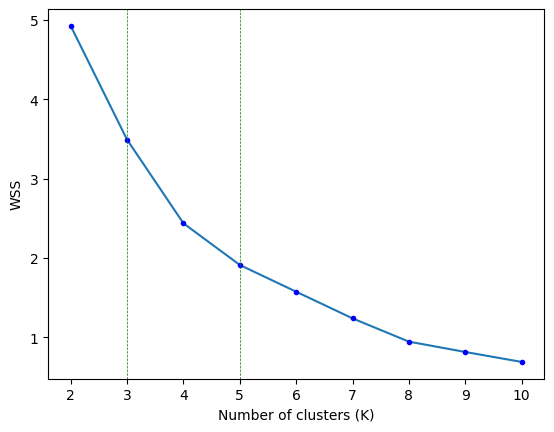

In [21]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('WSS')
plt.plot(k_rng, sse)
plt.plot(k_rng, sse, 'b.')
plt.grid(False)

plt.axvline(x=3, color='g', linestyle='--', linewidth='0.5')
plt.axvline(x=5, color='g', linestyle='--', linewidth='0.5')

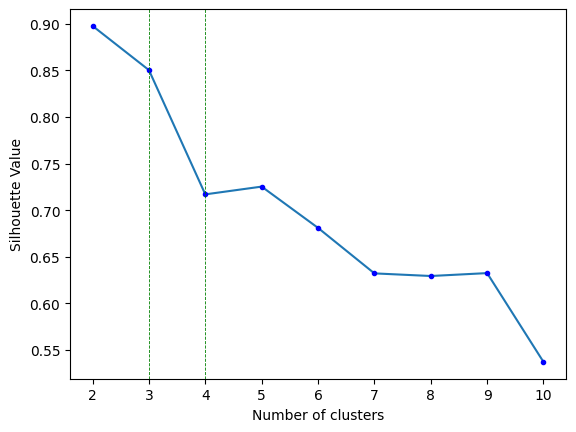

In [27]:
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Value')
plt.plot(NumberOfClusters, silhouette_score_values)
plt.plot(NumberOfClusters, silhouette_score_values, 'b.')
plt.grid(False)
plt.axvline(x=3, color='g', linestyle='--', linewidth='0.6')
plt.axvline(x=4, color='g', linestyle='--', linewidth='0.6')

### 1.1.b Silhouette method 

In [23]:
data.reset_index(inplace=True)

In [24]:
# X = data.loc[:, ['feature_dissatisfaction','feature_satisfaction', 'hungerstation_e', 'h_dissatisfaction', 'h_satisfaction', 'jahez_e', 'j_dissatisfaction', 'j_satisfaction', 'shgardi_e', 's_dissatisfaction', 's_satisfaction', 'toyou_e', 't_dissatisfaction', 't_satisfaction', 'thechefz_e', 'c_dissatisfaction', 'c_satisfaction']]
X = data.loc[:, ['feature_dissatisfaction','feature_satisfaction']]

In [25]:
X

,feature_dissatisfaction,feature_satisfaction
0,0.396700,0.570228
1,0.000000,0.367137
2,0.417857,0.000000
3,1.000000,0.000000
4,0.042805,0.000000
...,...,...
1246,0.000824,0.002227
1247,0.001321,0.007387
1248,0.000385,0.005045
1249,0.015021,0.000000


c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:
2
Silhouette score value
0.8977308373402795
Number Of Clusters:
3
Silhouette score value
0.8503341912441625


c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:
4
Silhouette score value
0.7170462041524276
Number Of Clusters:
5
Silhouette score value
0.7433258631504255


c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:
6
Silhouette score value
0.6606525865349246
Number Of Clusters:
7
Silhouette score value
0.6259458659622498


c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:
8
Silhouette score value
0.6294765121791271
Number Of Clusters:
9
Silhouette score value
0.5372700793500242


c:\Users\Senan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:
10
Silhouette score value
0.6256146539308866
Optimal number of components is:
2


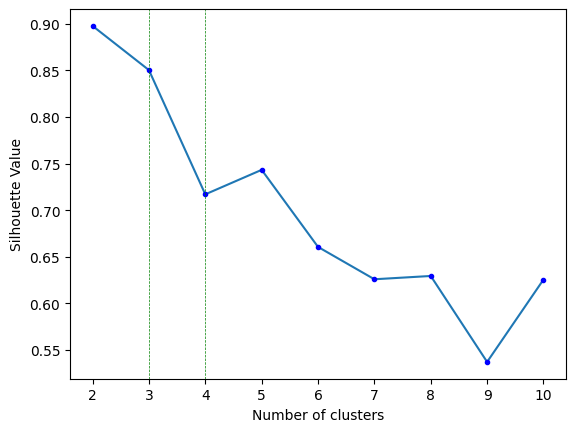

In [28]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()

NumberOfClusters=range(2,11)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++')
    classifier.fit(X)
    labels= classifier.predict(X)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.plot(NumberOfClusters, silhouette_score_values, 'b.')

# plt.title("Silhouette score values vs Numbers of Clusters ")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Value')
plt.axvline(x=3, color='g', linestyle='--', linewidth='0.5')
plt.axvline(x=4, color='g', linestyle='--', linewidth='0.5')
# plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

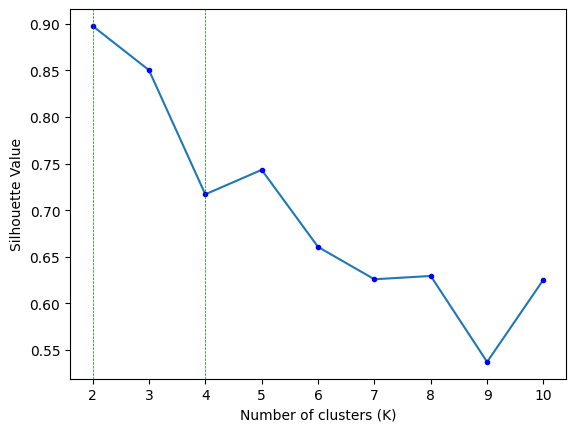

In [29]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Value')

plt.plot(NumberOfClusters, silhouette_score_values)
plt.plot(NumberOfClusters, silhouette_score_values, 'b.')

# plt.title("Silhouette score values vs Numbers of Clusters ")

# plt.axvline(x=3, color='g', linestyle='--', linewidth='0.5')
plt.axvline(x=2, color='g', linestyle='--', linewidth='0.5')
plt.axvline(x=4, color='g', linestyle='--', linewidth='0.5')

## 1.2 Hierarchical 

### 1.2.a Dendrogram 

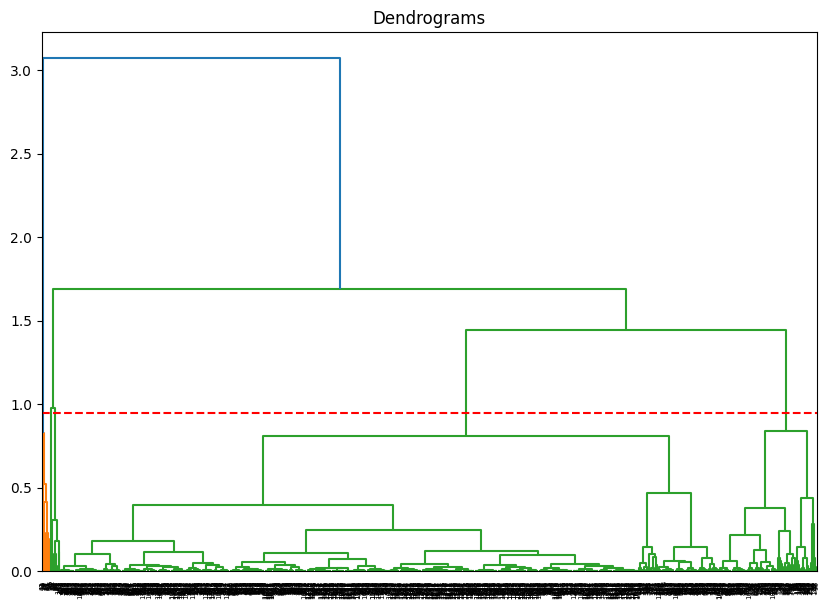

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=.95, color='r', linestyle='--')